In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project 1 - Quora Question Pair/train.csv")

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


<Axes: xlabel='is_duplicate'>

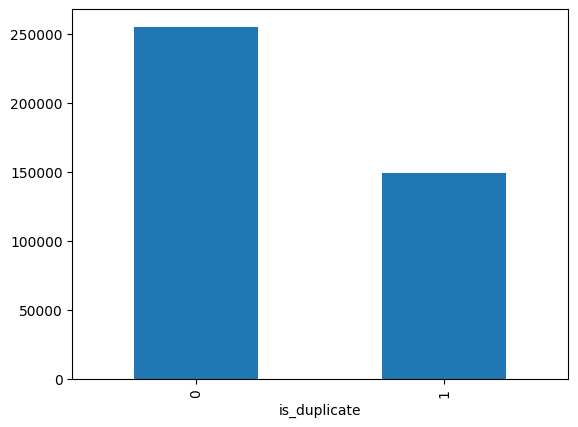

In [ ]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [ ]:
print(f"Total Number Of question pairs for training are {len(df)}")

Total Number Of question pairs for training are 404290


In [ ]:
temp = round(df['is_duplicate'].mean()*100,2)
print(f"Questions which are not duplicate is duplicate = 0 is {temp} %")
temp = 100-temp
print(f"Questions which are not duplicate is duplicate = 1 is {temp} %")

Questions which are not duplicate is duplicate = 0 is 36.92 %
Questions which are not duplicate is duplicate = 1 is 63.08 %


In [ ]:
new_df = df.sample(30000)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
212469,212469,35678,64141,What are the most upvoted answers on Quora?,Which is the most up voted answer in Quora?,1
128962,128962,89677,33303,What are the best java books?,Which is best book for Java?,1
379207,379207,510717,224241,Is there a technique to swiping a Metrocard in...,How does London compare to New York City when ...,0
291140,291140,73395,82319,What are some things new employees should know...,What are some things new employees should know...,0
87054,87054,12432,99038,What is the best free online IQ test?,What are some best sites for IQ test?,1


In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
temp = round(new_df['is_duplicate'].mean()*100,2)
print(f"Questions which are not duplicate is duplicate = 0 is {temp} %")
temp = 100-temp
print(f"Questions which are not duplicate is duplicate = 1 is {temp} %")

Questions which are not duplicate is duplicate = 0 is 37.04 %
Questions which are not duplicate is duplicate = 1 is 62.96 %


# No. Of Unique Question

In [ ]:
list1 = df['qid1'].tolist() + df['qid2'].tolist()
unique_qs = np.unique(list1)
len(unique_qs)
print(f"Total No. Of Unique Queestions are {len(unique_qs)}")

Total No. Of Unique Queestions are 55385


In [ ]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 55385

Number of unique questions that appear more than one time: 3430 (6.193012548523969%)

Max number of times a single question is repeated: 11



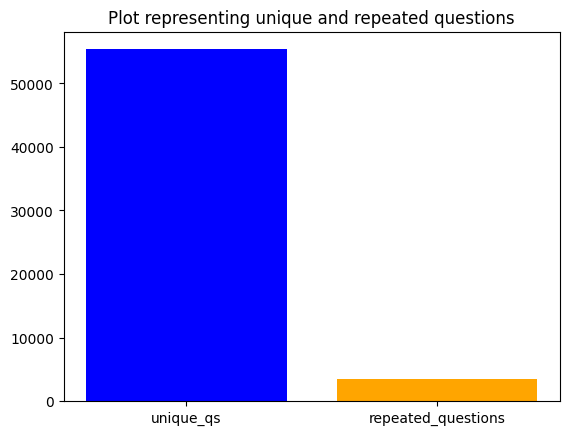

In [ ]:
import matplotlib.pyplot as plt

# Data
x = ["unique_qs", "repeated_questions"]
y = [unique_qs, qs_morethan_onetime]

# Create the bar plot
plt.bar(x, y,color=['blue', 'orange'])

# Add labels and title
#plt.xlabel("Classes")
#plt.ylabel("Length")
plt.title("Plot representing unique and repeated questions")

# Show the plot
plt.show()

#Check For Duplicate Rows

In [ ]:
temp_df = df.iloc[:,0:5]
temp_df.head()
duplicate_rows = temp_df.duplicated()
count_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 0


Maximum number of times a single question is repeated: 11



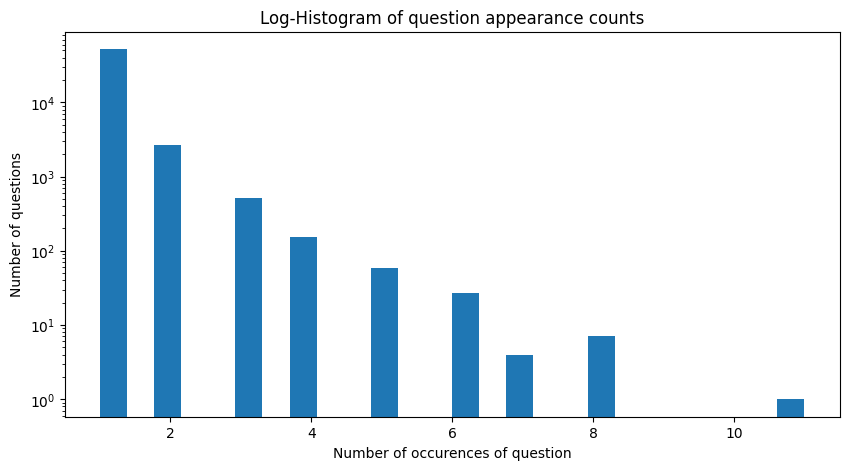

In [ ]:
plt.figure(figsize=(10, 5))

plt.hist(qids.value_counts(), bins=26)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

In [ ]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<ipython-input-37-ef527fb60746>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


In [ ]:
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<ipython-input-38-de06f25e882b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


# Basic Feature Extraction
### Let us now construct a few features like:

*   freq_qid1 = Frequency of qid1's

*   freq_qid2 = Frequency of qid2's

*   q1len = Length of q1

*   q2len = Length of q2
*   q1_n_words = Number of words in Question 1


*   q2_n_words = Number of words in Question 2


*   word_Common = (Number of common unique words in Question 1 and Question 2)


*   word_share = (word_common)/(word_Total)


*   freq_q1+freq_q2 = sum total of frequency of qid1 and qid2

*   freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2

In [ ]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['q1len'] = df['question1'].str.len()
df['q2len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
def word_common(sentance1,sentance2):
  word_set1 = set(sentance1.split())
  word_set2 = set(sentance2.split())
  common = word_set1.intersection(word_set2)
  return len(common)
df['word_Common'] = df.apply(lambda row: word_common(row['question1'],row['question2']),axis=1)
def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
        return 1.0 * (len(w1) + len(w2))
df['word_Total'] = df.apply(normalized_word_Total, axis=1)
def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df['word_share'] = df.apply(normalized_word_share, axis=1)
df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
212469,212469,35678,64141,What are the most upvoted answers on Quora?,Which is the most up voted answer in Quora?,1,2,2,43,43,8,9,3,17.0,0.176471,4,0
128962,128962,89677,33303,What are the best java books?,Which is best book for Java?,1,3,1,29,28,6,6,1,12.0,0.083333,4,2
379207,379207,510717,224241,Is there a technique to swiping a Metrocard in...,How does London compare to New York City when ...,0,1,2,56,74,11,15,2,24.0,0.083333,3,1
291140,291140,73395,82319,What are some things new employees should know...,What are some things new employees should know...,0,1,1,96,84,16,15,14,31.0,0.451613,2,0
87054,87054,12432,99038,What is the best free online IQ test?,What are some best sites for IQ test?,1,1,1,37,37,8,8,4,16.0,0.250000,2,0


In [ ]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 7
Number of Questions with minimum length [question2] : 2


<ipython-input-41-a8faaf34489a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
<ipython-input-41-a8faaf34489a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label 

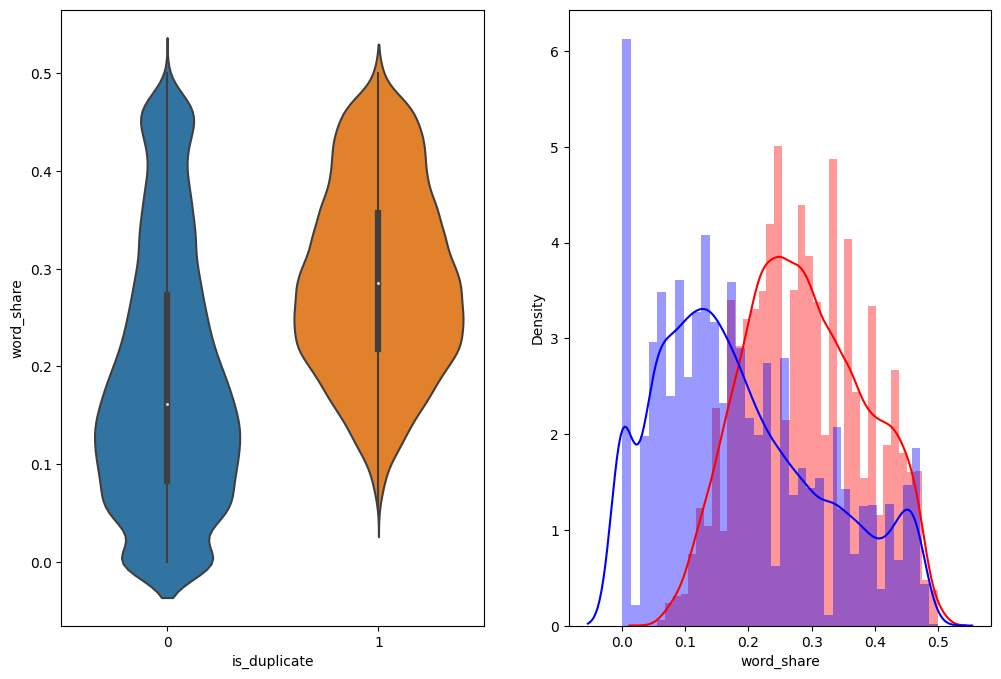

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

<ipython-input-42-bd5326372128>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
<ipython-input-42-bd5326372128>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , labe

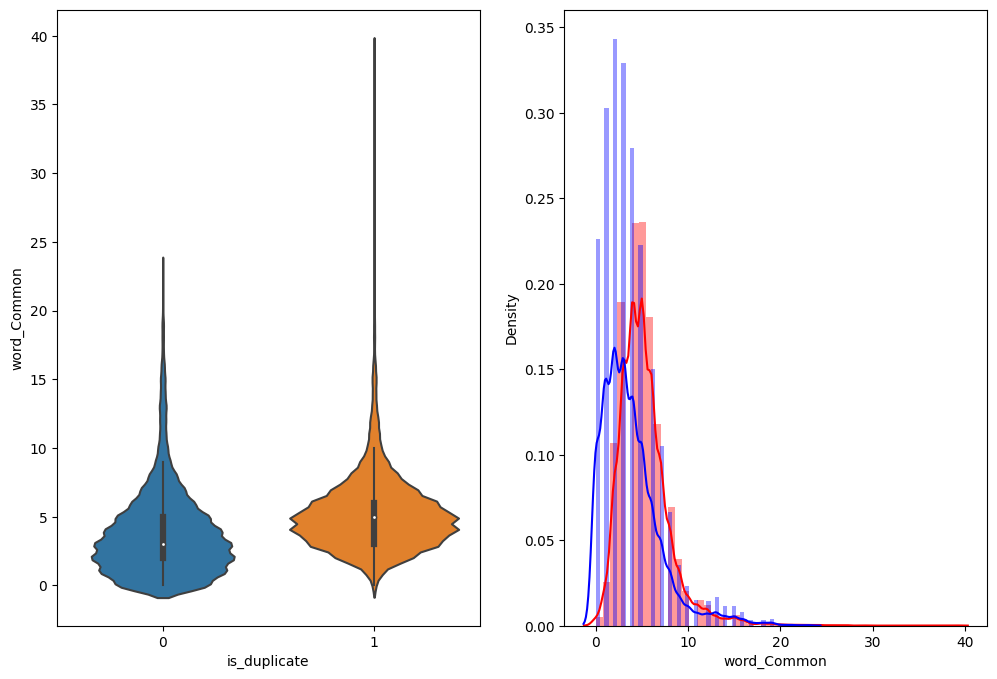

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words("english")
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [ ]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)
df.head()

<ipython-input-44-d7458753c764>:161: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1,2,2,43,43,8,9,3,17.0,0.176471,4,0
128962,128962,89677,33303,what are the best java books,which is best book for java,1,3,1,29,28,6,6,1,12.0,0.083333,4,2
379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0,1,2,56,74,11,15,2,24.0,0.083333,3,1
291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0,1,1,96,84,16,15,14,31.0,0.451613,2,0
87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1,1,1,37,37,8,8,4,16.0,0.250000,2,0


In [ ]:
# Advanced Features
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1,2,2,43,43,...,4,0,0.333322,0.333322,0.399992,0.333328,0.374995,0.333330,1.0,0.0
128962,128962,89677,33303,what are the best java books,which is best book for java,1,3,1,29,28,...,4,2,0.666644,0.666644,0.000000,0.000000,0.333328,0.333328,0.0,0.0
379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0,1,2,56,74,...,3,1,0.399992,0.249997,0.199996,0.166664,0.272725,0.199999,0.0,0.0
291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0,1,1,96,84,...,2,0,0.874989,0.777769,0.999986,0.999986,0.933327,0.874995,0.0,1.0
87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1,1,1,37,37,...,2,0,0.749981,0.599988,0.333322,0.249994,0.499994,0.499994,1.0,1.0


In [ ]:
# Fuzzy Features
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

print(df.shape)
df.head()

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


(30000, 29)


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1,2,2,43,43,...,0.399992,0.333328,0.374995,0.333330,1.0,0.0,83,83,79,79
128962,128962,89677,33303,what are the best java books,which is best book for java,1,3,1,29,28,...,0.000000,0.000000,0.333328,0.333328,0.0,0.0,47,48,65,65
379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0,1,2,56,74,...,0.199996,0.166664,0.272725,0.199999,0.0,0.0,25,29,36,37
291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0,1,1,96,84,...,0.999986,0.999986,0.933327,0.874995,0.0,1.0,89,95,89,96
87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1,1,1,37,37,...,0.333322,0.249994,0.499994,0.499994,1.0,1.0,64,64,72,69


In [ ]:
def calculate_length_features(df, feature1_column, feature2_column):
    def get_length(sentence):
        # Tokenize the sentence and get the number of tokens
        tokens = sentence.split()
        return len(tokens)

    # Calculate absolute length difference and mean length
    df["abs_len_diff"] = df.apply(lambda row: abs(get_length(row[feature1_column]) - get_length(row[feature2_column])), axis=1)
    df["mean_len"] = df.apply(lambda row: (get_length(row[feature1_column]) + get_length(row[feature2_column])) / 2, axis=1)

    return df

# Call the function to calculate length features
df = calculate_length_features(df, feature1_column='question1', feature2_column='question2')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,abs_len_diff,mean_len
212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1,2,2,43,43,...,0.374995,0.333330,1.0,0.0,83,83,79,79,1,8.5
128962,128962,89677,33303,what are the best java books,which is best book for java,1,3,1,29,28,...,0.333328,0.333328,0.0,0.0,47,48,65,65,0,6.0
379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0,1,2,56,74,...,0.272725,0.199999,0.0,0.0,25,29,36,37,4,13.0
291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0,1,1,96,84,...,0.933327,0.874995,0.0,1.0,89,95,89,96,1,15.5
87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1,1,1,37,37,...,0.499994,0.499994,1.0,1.0,64,64,72,69,0,8.0


In [ ]:
!pip install distance
import distance
def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=ca2a4620fe93732f297c60fe5a8f0cdda79693999abbe0bd50d39100b6f5554d
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,abs_len_diff,mean_len,longest_substr_ratio
212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1,2,2,43,43,...,0.333330,1.0,0.0,83,83,79,79,1,8.5,0.279070
128962,128962,89677,33303,what are the best java books,which is best book for java,1,3,1,29,28,...,0.333328,0.0,0.0,47,48,65,65,0,6.0,0.214286
379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0,1,2,56,74,...,0.199999,0.0,0.0,25,29,36,37,4,13.0,0.160714
291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0,1,1,96,84,...,0.874995,0.0,1.0,89,95,89,96,1,15.5,0.928571
87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1,1,1,37,37,...,0.499994,1.0,1.0,64,64,72,69,0,8.0,0.216216


In [ ]:
df1 = df.iloc[:,:6]
df1.head()

,id,qid1,qid2,question1,question2,is_duplicate
212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1
128962,128962,89677,33303,what are the best java books,which is best book for java,1
379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0
291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0
87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1


In [ ]:
df1.to_csv("New_train.csv")

In [ ]:
df.to_csv("FeatureWala.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project 1 - Quora Question Pair/New_train.csv")

In [ ]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
0,212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1
1,128962,128962,89677,33303,what are the best java books,which is best book for java,1
2,379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0
3,291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0
4,87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1


In [ ]:
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))
df.head()
# avoid decoding problems

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate
0,212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1
1,128962,128962,89677,33303,what are the best java books,which is best book for java,1
2,379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0
3,291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0
4,87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1


In [ ]:
# merge texts
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

In [ ]:
!python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
!python -m spacy download en

2023-07-31 10:00:52.152482: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 10:00:53.493460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
2023-07-31 10:01:44.266493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 10:01:46.833483: W tensorflow/compiler/tf2tensorrt/utils/py

In [ ]:
import spacy
spacy.cli.download("en_core_web_md")
nlp = spacy.load("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import spacy
import numpy as np
from tqdm import tqdm

# Load the spaCy model
nlp = spacy.load("en_core_web_md")  # Use the medium model for English

# Assuming you have a word2tfidf dictionary that maps words to their TF-IDF scores

def sentence_to_vector(sentence, word2tfidf, model=nlp):
    doc = model(sentence)
    mean_vec = np.zeros(doc[0].vector.shape)
    total_idf = 0
    for word in doc:
        vec = word.vector
        try:
            idf = word2tfidf[str(word)]
        except KeyError:
            idf = 0
        mean_vec += vec * idf
        total_idf += idf

    if total_idf != 0:
        mean_vec /= total_idf

    # Resize the vector to have a length of 100
    if len(mean_vec) <= 100:
        return mean_vec
    else:
        return mean_vec[:100]

# Assuming you have a DataFrame df with a column called 'question2' and word2tfidf is defined

# Apply the sentence_to_vector function to each question in 'question2'
vecs2 = []
for question in tqdm(df['question2']):
    vec = sentence_to_vector(question, word2tfidf)
    vecs2.append(vec)

# Assign the computed vectors to a new column 'q2_feats_m' in the DataFrame
df['q2_feats_m'] = list(vecs2)

vecs1 = []
for question in tqdm(df['question1']):
    vec = sentence_to_vector(question, word2tfidf)
    vecs1.append(vec)

# Assign the computed vectors to a new column 'q2_feats_m' in the DataFrame
df['q1_feats_m'] = list(vecs2)

100%|██████████| 30000/30000 [05:42<00:00, 87.50it/s] 


In [ ]:
df.to_csv('output_file.csv')

In [ ]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q2_feats_m,q1_feats_m
0,212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1,"[-0.9868303066010968, -0.28356024077746117, 0....","[-0.9868303066010968, -0.28356024077746117, 0...."
1,128962,128962,89677,33303,what are the best java books,which is best book for java,1,"[-1.3825205643473366, -1.851928517704076, 1.77...","[-1.3825205643473366, -1.851928517704076, 1.77..."
2,379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0,"[-0.3024681327958053, 1.049693866758205, -3.31...","[-0.3024681327958053, 1.049693866758205, -3.31..."
3,291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0,"[0.029036745895802987, 1.242097671421775, -3.4...","[0.029036745895802987, 1.242097671421775, -3.4..."
4,87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1,"[0.42944684110979253, 1.8947870966194624, -0.2...","[0.42944684110979253, 1.8947870966194624, -0.2..."


In [ ]:
df3_q1 = pd.DataFrame(df.q1_feats_m.values.tolist(), index= df.index)
df3_q2 = pd.DataFrame(df.q2_feats_m.values.tolist(), index= df.index)

In [ ]:
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.986830,-0.283560,0.346376,1.248416,4.843778,1.910976,-0.106533,5.178074,-2.086760,-1.181286,...,-1.203557,2.582217,1.721314,-3.101274,2.739505,1.594776,1.354557,-2.146248,1.220598,1.090885
1,-1.382521,-1.851929,1.774400,-1.911027,2.591951,-0.795783,2.080378,2.916727,-2.563686,-0.497127,...,-0.587652,0.429686,0.323292,-2.697881,-2.751539,-2.482071,0.631653,-1.069813,-0.673324,0.093367
2,-0.302468,1.049694,-3.312273,-0.404356,2.999061,-0.719780,2.711665,3.590402,-1.662614,0.886318,...,-0.785382,1.148488,0.656031,-3.839355,-1.669624,-0.859001,0.836643,-1.212383,1.917696,-0.556063
3,0.029037,1.242098,-3.423824,0.375451,3.118923,1.634563,-0.295965,4.487059,-1.464142,0.523278,...,-2.069519,0.580473,0.634482,-3.290970,-0.484841,0.063260,3.250265,-3.010178,1.092568,1.464304
4,0.429447,1.894787,-0.285903,3.373235,2.669384,2.135028,0.014011,4.618085,-5.178933,-0.592262,...,-2.849797,2.608535,0.843896,0.426159,-1.777173,-0.937758,1.564757,-2.847479,-1.570810,-0.043485


In [ ]:
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.986830,-0.283560,0.346376,1.248416,4.843778,1.910976,-0.106533,5.178074,-2.086760,-1.181286,...,-1.203557,2.582217,1.721314,-3.101274,2.739505,1.594776,1.354557,-2.146248,1.220598,1.090885
1,-1.382521,-1.851929,1.774400,-1.911027,2.591951,-0.795783,2.080378,2.916727,-2.563686,-0.497127,...,-0.587652,0.429686,0.323292,-2.697881,-2.751539,-2.482071,0.631653,-1.069813,-0.673324,0.093367
2,-0.302468,1.049694,-3.312273,-0.404356,2.999061,-0.719780,2.711665,3.590402,-1.662614,0.886318,...,-0.785382,1.148488,0.656031,-3.839355,-1.669624,-0.859001,0.836643,-1.212383,1.917696,-0.556063
3,0.029037,1.242098,-3.423824,0.375451,3.118923,1.634563,-0.295965,4.487059,-1.464142,0.523278,...,-2.069519,0.580473,0.634482,-3.290970,-0.484841,0.063260,3.250265,-3.010178,1.092568,1.464304
4,0.429447,1.894787,-0.285903,3.373235,2.669384,2.135028,0.014011,4.618085,-5.178933,-0.592262,...,-2.849797,2.608535,0.843896,0.426159,-1.777173,-0.937758,1.564757,-2.847479,-1.570810,-0.043485


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project 1 - Quora Question Pair/FeatureWala.csv")

In [ ]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,...,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,abs_len_diff,mean_len,longest_substr_ratio
0,212469,212469,35678,64141,what are the most upvoted answers on quora,which is the most up voted answer in quora,1,2,2,43,...,0.333330,1.0,0.0,83,83,79,79,1,8.5,0.279070
1,128962,128962,89677,33303,what are the best java books,which is best book for java,1,3,1,29,...,0.333328,0.0,0.0,47,48,65,65,0,6.0,0.214286
2,379207,379207,510717,224241,is there a technique to swiping a metrocard in...,how does london compare to new york city when ...,0,1,2,56,...,0.199999,0.0,0.0,25,29,36,37,4,13.0,0.160714
3,291140,291140,73395,82319,what are some things new employees should know...,what are some things new employees should know...,0,1,1,96,...,0.874995,0.0,1.0,89,95,89,96,1,15.5,0.928571
4,87054,87054,12432,99038,what is the best free online iq test,what are some best sites for iq test,1,1,1,37,...,0.499994,1.0,1.0,64,64,72,69,0,8.0,0.216216


In [ ]:
df1 = df.drop(['qid1','qid2','question1','question2','Unnamed: 0'],axis=1)
df1.head()

,id,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,...,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,abs_len_diff,mean_len,longest_substr_ratio
0,212469,1,2,2,43,43,8,9,3,17.0,...,0.333330,1.0,0.0,83,83,79,79,1,8.5,0.279070
1,128962,1,3,1,29,28,6,6,1,12.0,...,0.333328,0.0,0.0,47,48,65,65,0,6.0,0.214286
2,379207,0,1,2,56,74,11,15,2,24.0,...,0.199999,0.0,0.0,25,29,36,37,4,13.0,0.160714
3,291140,0,1,1,96,84,16,15,14,31.0,...,0.874995,0.0,1.0,89,95,89,96,1,15.5,0.928571
4,87054,1,1,1,37,37,8,8,4,16.0,...,0.499994,1.0,1.0,64,64,72,69,0,8.0,0.216216


In [ ]:
# Merge the three DataFrames on the 'id' column
df3_q1['id']=df1['id']
df3_q2['id']=df1['id']
merged_df = df1.merge(df3_q1, on='id', how='inner').merge(df3_q2, on='id', how='inner')
merged_df.head()

,id,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,...,90_y,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y
0,212469,1,2,2,43,43,8,9,3,17.0,...,-1.203557,2.582217,1.721314,-3.101274,2.739505,1.594776,1.354557,-2.146248,1.220598,1.090885
1,128962,1,3,1,29,28,6,6,1,12.0,...,-0.587652,0.429686,0.323292,-2.697881,-2.751539,-2.482071,0.631653,-1.069813,-0.673324,0.093367
2,379207,0,1,2,56,74,11,15,2,24.0,...,-0.785382,1.148488,0.656031,-3.839355,-1.669624,-0.859001,0.836643,-1.212383,1.917696,-0.556063
3,291140,0,1,1,96,84,16,15,14,31.0,...,-2.069519,0.580473,0.634482,-3.290970,-0.484841,0.063260,3.250265,-3.010178,1.092568,1.464304
4,87054,1,1,1,37,37,8,8,4,16.0,...,-2.849797,2.608535,0.843896,0.426159,-1.777173,-0.937758,1.564757,-2.847479,-1.570810,-0.043485


In [ ]:
merged_df.to_csv("final_dataset.csv")

In [ ]:
merged_df.head()

,id,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,...,90_y,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y
0,212469,1,2,2,43,43,8,9,3,17.0,...,-1.203557,2.582217,1.721314,-3.101274,2.739505,1.594776,1.354557,-2.146248,1.220598,1.090885
1,128962,1,3,1,29,28,6,6,1,12.0,...,-0.587652,0.429686,0.323292,-2.697881,-2.751539,-2.482071,0.631653,-1.069813,-0.673324,0.093367
2,379207,0,1,2,56,74,11,15,2,24.0,...,-0.785382,1.148488,0.656031,-3.839355,-1.669624,-0.859001,0.836643,-1.212383,1.917696,-0.556063
3,291140,0,1,1,96,84,16,15,14,31.0,...,-2.069519,0.580473,0.634482,-3.290970,-0.484841,0.063260,3.250265,-3.010178,1.092568,1.464304
4,87054,1,1,1,37,37,8,8,4,16.0,...,-2.849797,2.608535,0.843896,0.426159,-1.777173,-0.937758,1.564757,-2.847479,-1.570810,-0.043485


In [ ]:
merged_df.to_csv("final_dataset.csv")